In [12]:
# %pip install keras
# %pip install tensorflow
# %pip install seaborn

     ---------------------------------------- 0.0/160.8 kB ? eta -:--:--
     ------------------------------------ - 153.6/160.8 kB 4.5 MB/s eta 0:00:01
     -------------------------------------- 160.8/160.8 kB 3.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/294.8 kB ? eta -:--:--
   ---------------------------------------- 294.8/294.8 kB 9.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.9/7.6 MB 27.7 MB/s eta 0:00:01
   -------- ------------------------------- 1.6/7.6 MB 21.0 MB/s eta 0:00:01
   ------------- -------------------------- 2.6/7.6 MB 20.4 MB/s eta 0:00:01
   ------------------ --------------------- 3.6/7.6 MB 20.7 MB/s eta 0:00:01
   ---------------------- ----------------- 4.4/7.6 MB 20.0 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.6 MB 20.8 MB/s eta 0:00:01
   ----------------------------------- ---- 6.7/7.6 MB 21.5 MB/s eta 0:00:01
   -----

### Module importing

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
print(os.listdir('../input'))

C:\Users\dhsmf\AppData\Local\Temp\ipykernel_1212\422538072.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


['sample_submission.csv', 'test.csv', 'train.csv']


### Data Loading

In [2]:
train = pd.read_csv("../input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test = pd.read_csv('../input/test.csv')
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Split Label from raw data
Y_train = train['label']
X_train = train.drop(labels=['label'], axis=1)

In [36]:
plt.figure(figsize=(15,7))
gph = sns.countplot(x=Y_train.values, palette='icefire')
plt.title('Number of digit classes')
Y_train.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

<Figure size 1500x700 with 0 Axes>

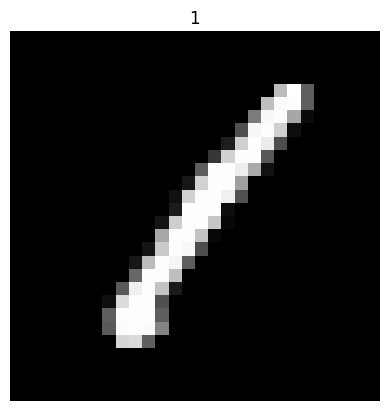

In [5]:
# print(X_train.iloc[0].values)
img = X_train.iloc[0].values
img = img.reshape((28,28)) # 픽셀에 대한 데이터 784(785-1[label])를 2차원으로 변환 (28*28 = 784)
plt.imshow(img, cmap='gray')
plt.title(train.iloc[0,0])
plt.axis('off')
plt.show()

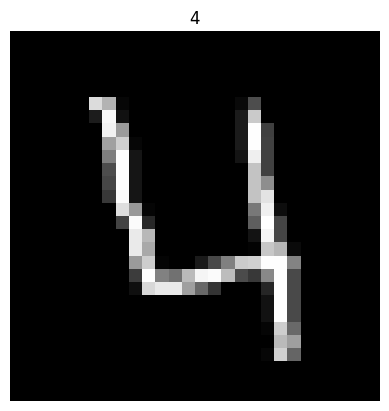

In [6]:
img = X_train.iloc[3].values
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[3,0])
plt.axis('off')
plt.show()

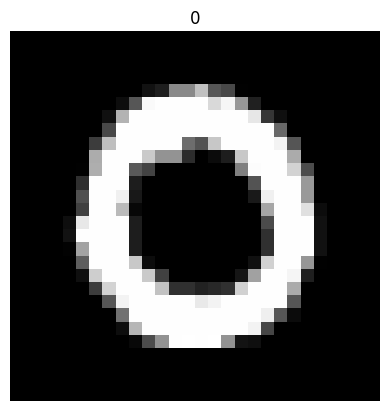

In [7]:
img = X_train.iloc[1].values
img = img.reshape((28,28))
plt.imshow(img, cmap='gray')
plt.title(train.iloc[1,0])
plt.axis('off')
plt.show()

In [11]:
# 각 이미지의 pixel값에 대한 최댓값 : 255
# print(max(X_train.iloc[1].values))
x = [ max(X_train.iloc[i].values) for i in range(len(X_train)) ]
print(max(x))

255


In [9]:
# Normalize the data
X_train = X_train / 255.0 # pixel값의 범위가 0~255이므로 정규화를 위해 255.0로 나눔
test = test / 255.0
print(X_train.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [12]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1) # 흑백 이미지이므로 4번째 인자의 수치를 '1'; 유색일 경우, '3'
test = test.values.reshape(-1,28,28,1)
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [23]:
# print(X_train[0][1])
print(len(X_train[0][0]), len(X_train[0]))

28 28


In [24]:
# Label Encoding
from tensorflow.keras.utils import to_categorical # Convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes=10) # As the number 0 to 9, num_classes=10

In [27]:
# X_train의 0번째가 '1'에 대한 pixel 값을 가지므로
print(Y_train[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [23]:
%pip install scikit-learn

     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.6 kB/s eta 0:00:00
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   -- ------------------------------------- 0.7/10.6 MB 21.5 MB/s eta 0:00:01
   --------- ------------------------------ 2.5/10.6 MB 32.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.4/10.6 MB 35.2 MB/s eta 0:00:01
   ----------------------- ---------------- 6.2/10.6 MB 35.8 MB/s eta 0:00:01
   ----------------------------- ---------- 7.9/10.6 MB 36.2 MB/s eta 0:00:01
   ------------------------------------ --- 9.7/10.6 MB 36.5 MB/s eta 0:00:01
   ---------------------------------------  10.6/10.6 MB 38.5 MB/s eta 0:00:01
   -------------

In [28]:
# Train, Test split to 9:1
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=2)
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)

(37800, 28, 28, 1)
(37800, 10)
(4200, 28, 28, 1)
(4200, 10)


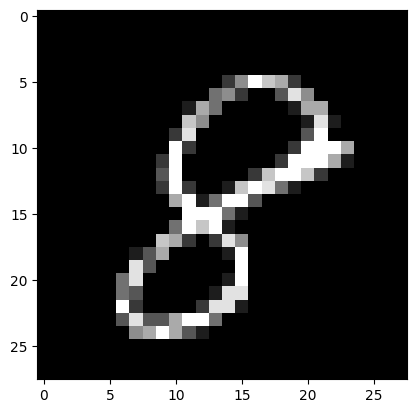

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [32]:
# Validation data와의 분리를 통해 얻은 훈련 데이터의 0번째 이미지는 숫자 '8'의 픽셀 값을 가짐
plt.imshow(X_train[0][:,:,], cmap='gray') # (-1,28,28,1) 이므로, 0번째 데이터의 0~28,0~28,0에 해당하는 값을 출력
plt.show()
print(Y_train[0])

In [54]:
# CNN Generating
from sklearn.metrics import confusion_matrix

from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator # data를 label과 함께 model로 쉽게 import 하기 위해 사용, 저장된 데이터에 영향을 주지 않고 모델에 전달하는 동안 데이터를 변경

In [55]:
# Conv2D : padding='Same' or 'Valid'
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(5,5), padding='Same', activation = 'relu', input_shape=(28,28,1))) # 최초 입력되는 이미지 데이터의 형태 (28,28,1); padding은 입출력을 같은 크기로 지정;  
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

# Fully-connected Layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [56]:
# Optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [63]:
# Compile the model
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [64]:
epochs = 10
batch_size = 250

In [65]:
# # Data Augmentation
# # To avoid overfitting problem, we need to expand artificially our handwritten digit dataset
# datagen = ImageDataGenerator(
#     featurewise_center=False, # Set input means to 0 over the dataset
#     samplewise_center=False, # Set each sample mean to 0
#     samplewise_std_normalization=False, # Divide each input by its std
#     zca_whitening=False, # dimension reduction
#     rotation_range=5, # randomly rotate images in the rage 5 degrees
#     zoom_range=0.1, # Randomly zoom image 10%
#     width_shift_range=0.1, # Randomly shift images horizontally 10%
#     height_shift_range=0.1, # Randomly shift images vertically 10%
#     horizontal_flip=False, # Randomly flip images
#     vertical_flip=False) # Randomly filp images

# datagen.fit(X_train)

In [66]:
# # Fit the model
# history = model.fit_generator(
#     datagen.flow(X_train, Y_train, batch_size=batch_size), 
#     epochs=epochs, 
#     validation_data=(X_val,Y_val), 
#     steps_per_epoch=X_train.shape[0] // batch_size)

NameError: name 'scipy' is not defined

In [67]:
# Fit the model
history = model.fit(
    X_train, Y_train, batch_size=batch_size, 
    epochs=epochs, 
    validation_data=(X_val,Y_val))

Epoch 1/10



152/152 [==============================] - 19s 51ms/step - loss: 0.7564 - accuracy: 0.7535 - val_loss: 0.2079 - val_accuracy: 0.9410
Epoch 2/10
152/152 [==============================] - 7s 44ms/step - loss: 0.2570 - accuracy: 0.9202 - val_loss: 0.1234 - val_accuracy: 0.9624
Epoch 3/10
152/152 [==============================] - 7s 43ms/step - loss: 0.1881 - accuracy: 0.9416 - val_loss: 0.0977 - val_accuracy: 0.9705
Epoch 4/10
152/152 [==============================] - 7s 45ms/step - loss: 0.1545 - accuracy: 0.9519 - val_loss: 0.0786 - val_accuracy: 0.9748
Epoch 5/10
152/152 [==============================] - 6s 42ms/step - loss: 0.1328 - accuracy: 0.9586 - val_loss: 0.0665 - val_accuracy: 0.9802
Epoch 6/10
152/152 [==============================] - 6s 38ms/step - loss: 0.1199 - accuracy: 0.9627 - val_loss: 0.0624 - val_accuracy: 0.9817
Epoch 7/10
152/152 [==============================] - 6s 38ms/step - loss: 0.1067 - accuracy: 0.9671 - val_loss: 0.0564 - val_accuracy: 0.9821
Epoch 8/1

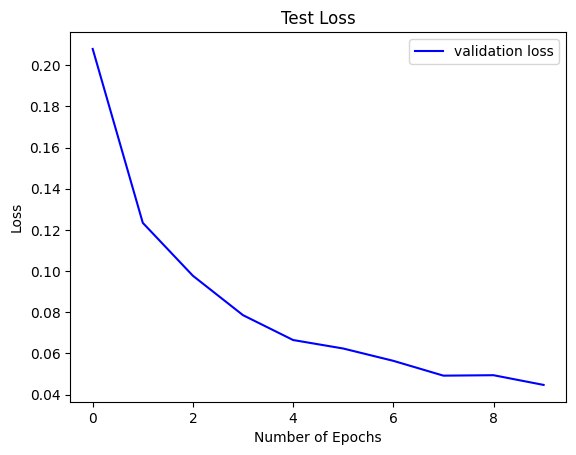

In [68]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 6ms/step


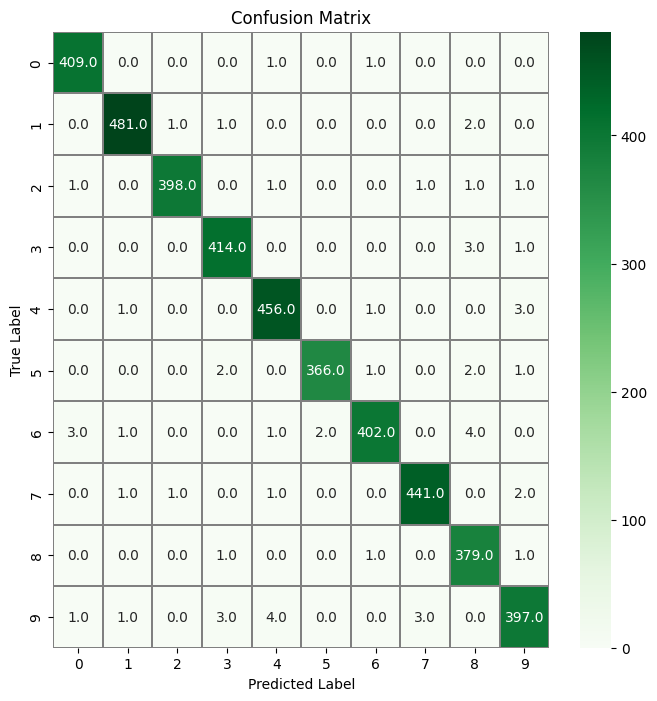

In [69]:
# confusion matrix
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [61]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 7, 7, 16)         